In [ ]:
!ls -lh final_split_balanced*


-rw-rw-rw- 1 root root 354M Jul 20 08:17 final_split_balanced-20250720T072049Z-1-001.zip


In [ ]:
!apt update && apt install -y p7zip-full


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease               
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease                 
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease            
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
146 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 146 not upgraded.


In [ ]:
!7z x final_split_balanced-20250720T072049Z-1-001.zip -oextracted/



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,252 CPUs AMD EPYC 7763 64-Core Processor                 (A00F11),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 370330258 bytes (354 MiB)

Extracting archive: final_split_balanced-20250720T072049Z-1-001.zip
 54% 4096 Op            --
Path = final_split_balanced-20250720T072049Z-1-001.zip
Type = zip
Physical Size = 370330258

      0% 2        0% 54 - final_split_balanced/valid/masks/file_0417.p                                                        0% 8        0% 109 - final_split_balanced/valid/masks/file_0131.pn                                                          0% 1        1% 1        1% 1        2% 2        3% 2        4% 261 - final_split_balanced/filtered_data/images/file_0553.p                                                                  4% 2        5% 314 - final_split_balanced/train/images/file_0558.p          

In [ ]:
!pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/68/1f/795e7f4aa2eacc59afa4fb61a2e35e510d06414dd5a802b51a012d691b37/opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
  Obtaining dependency information for numpy<2.3.0,>=2 from https://files.pythonhosted.org/packages/b3/dd/2238b898e51bd6d389b7389ffb20d7f4c10066d80351187ec8e303a5a475/numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 16.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 22.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages th

In [ ]:
!pip install numpy==1.26.4 --force-reinstall --no-cache-dir


  Obtaining dependency information for numpy==1.26.4 from https://files.pythonhosted.org/packages/3a/d0/edc009c27b406c4f9cbc79274d6e46d634d139075492ad055e3d68445925/numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 318.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
import numpy as np
print("NumPy version:", np.__version__)


NumPy version: 1.26.4


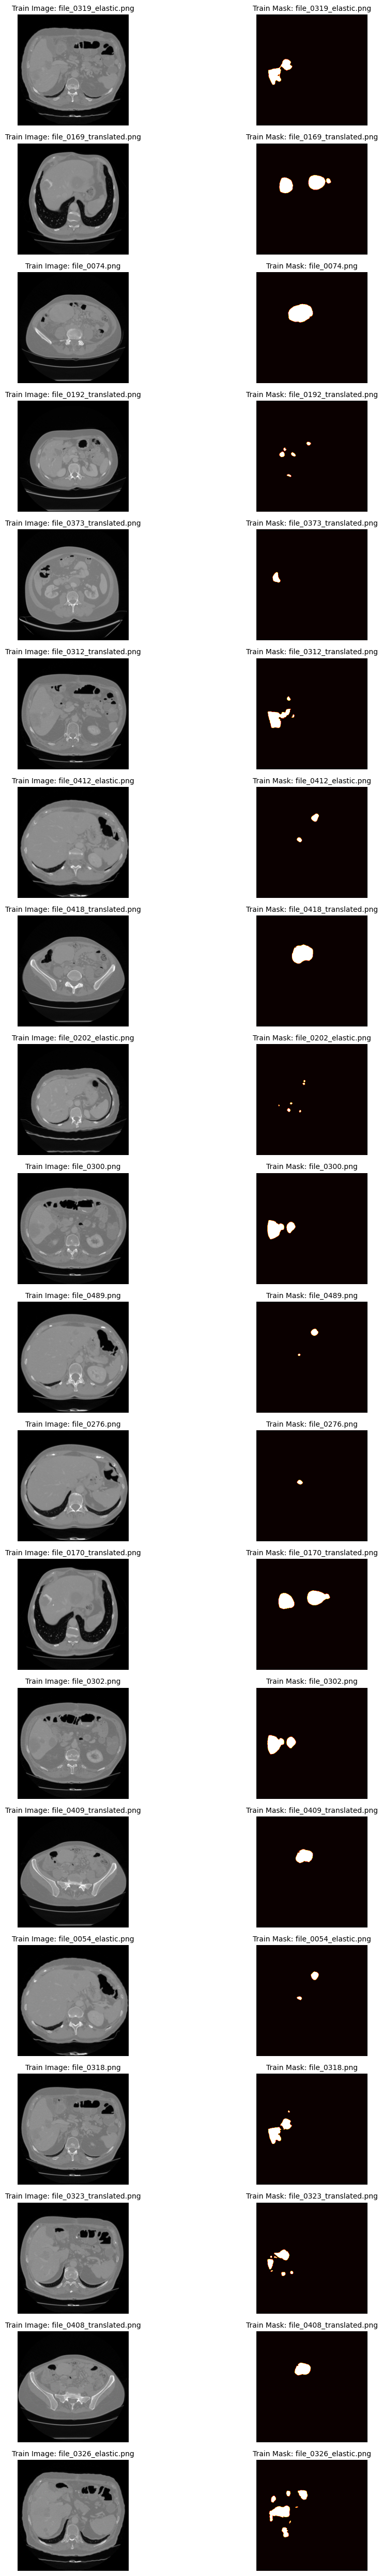

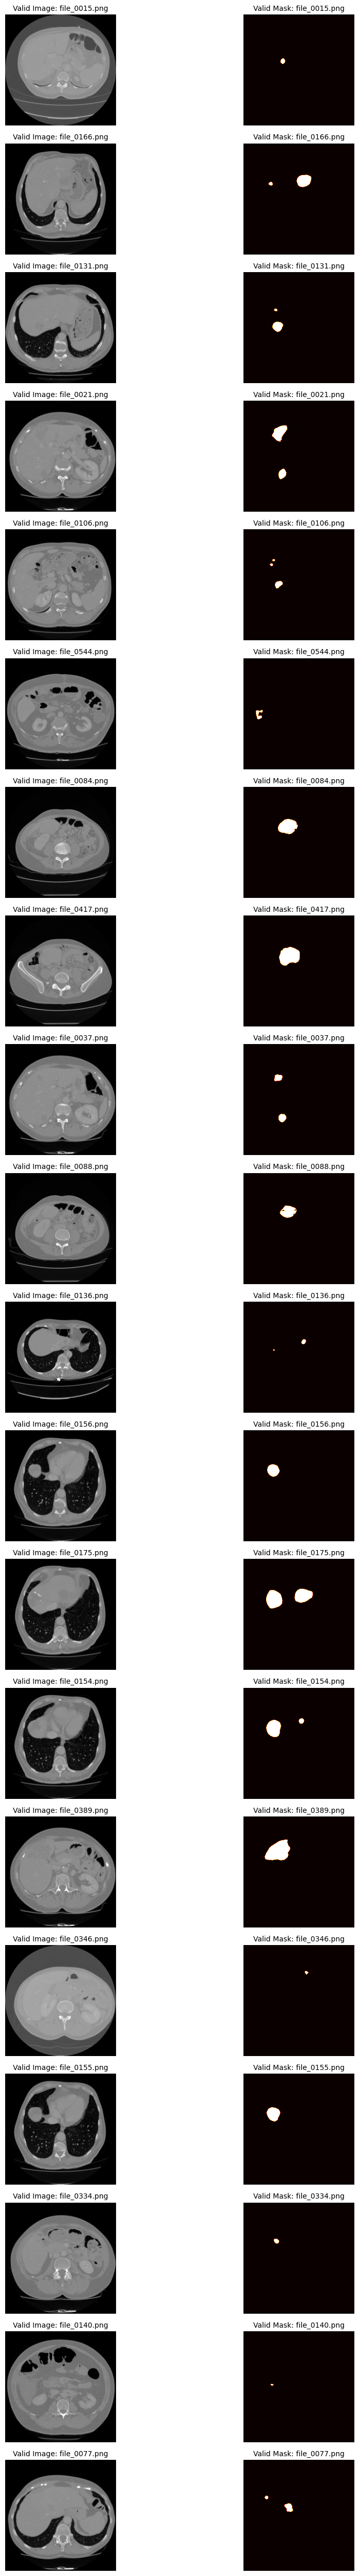

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Set paths
train_img_path = "/workspace/extracted/final_split_balanced/filtered_data/images"
train_mask_path = "/workspace/extracted/final_split_balanced/filtered_data/masks"
valid_img_path = "/workspace/extracted/final_split_balanced/valid/images"
valid_mask_path = "/workspace/extracted/final_split_balanced/valid/masks"

# Display function with large images
def display_image_mask_pairs(image_dir, mask_dir, count=20, title=""):
    image_ids = sorted(os.listdir(image_dir))
    selected_ids = random.sample(image_ids, min(count, len(image_ids)))

    rows = count
    plt.figure(figsize=(12, rows * 2.5))  # Larger figure: each row is taller

    for i, image_id in enumerate(selected_ids):
        # Load image and mask
        image = cv2.imread(os.path.join(image_dir, image_id), cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(os.path.join(mask_dir, image_id), cv2.IMREAD_GRAYSCALE)

        # Display image
        plt.subplot(rows, 2, 2*i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{title} Image: {image_id}", fontsize=10)
        plt.axis('off')

        # Display mask
        plt.subplot(rows, 2, 2*i + 2)
        plt.imshow(mask, cmap='hot')
        plt.title(f"{title} Mask: {image_id}", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show 20 large training pairs
display_image_mask_pairs(train_img_path, train_mask_path, count=20, title="Train")

# Show 20 large validation pairs
display_image_mask_pairs(valid_img_path, valid_mask_path, count=20, title="Valid")


In [ ]:
import os

# Paths
train_img_path = "/workspace/extracted/final_split_balanced/filtered_data/images"
train_mask_path = "/workspace/extracted/final_split_balanced/filtered_data/masks"
valid_img_path = "/workspace/extracted/final_split_balanced/valid/images"
valid_mask_path = "/workspace/extracted/final_split_balanced/valid/masks"

# Helper to count only image files
def count_images(folder):
    valid_extensions = ('.png', '.jpg', '.jpeg')
    return len([
        f for f in os.listdir(folder)
        if f.lower().endswith(valid_extensions) and not f.startswith(".")
    ])

# Count
print("Train Images:", count_images(train_img_path))
print("Train Masks: ", count_images(train_mask_path))
print("Valid Images:", count_images(valid_img_path))
print("Valid Masks: ", count_images(valid_mask_path))


Train Images: 1362
Train Masks:  1362
Valid Images: 57
Valid Masks:  57


In [ ]:
import os

# Paths
train_img_path = "/workspace/extracted/final_split_balanced/augmentedtrain/images"
train_mask_path = "/workspace/extracted/final_split_balanced/augmentedtrain/masks"
valid_img_path = "/workspace/extracted/final_split_balanced/valid/images"
valid_mask_path = "/workspace/extracted/final_split_balanced/valid/masks"

# Helper to count only image files
def count_images(folder):
    valid_extensions = ('.png', '.jpg', '.jpeg')
    return len([
        f for f in os.listdir(folder)
        if f.lower().endswith(valid_extensions) and not f.startswith(".")
    ])

# Count
print("Train Images:", count_images(train_img_path))
print("Train Masks: ", count_images(train_mask_path))
print("Valid Images:", count_images(valid_img_path))
print("Valid Masks: ", count_images(valid_mask_path))


Train Images: 1816
Train Masks:  1816
Valid Images: 57
Valid Masks:  57


In [ ]:
#fine-tune the shape prior loss hyperparameter

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import importlib.util
import cv2
import gc
from tensorflow.keras.callbacks import EarlyStopping

# === DICOMDataGen ===
class DICOMDataGen(tf.keras.utils.Sequence):
    def __init__(self, image_ids, img_path, mask_path, batch_size=4, image_size=512, shuffle=True):
        self.ids = image_ids
        self.img_path = img_path
        self.mask_path = mask_path
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __load__(self, item):
        image = cv2.imread(os.path.join(self.img_path, item), cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
        mask = cv2.imread(os.path.join(self.mask_path, item), cv2.IMREAD_GRAYSCALE).astype(np.float32)
        mask = (mask >= 255).astype(np.float32)

        image = cv2.resize(image, (self.image_size, self.image_size), interpolation=cv2.INTER_LINEAR)
        mask = cv2.resize(mask, (self.image_size, self.image_size), interpolation=cv2.INTER_NEAREST)

        return np.expand_dims(image, axis=-1), np.expand_dims(mask, axis=-1)

    def __getitem__(self, index):
        batch_ids = self.ids[index * self.batch_size : (index + 1) * self.batch_size]
        images, masks = zip(*(self.__load__(i) for i in batch_ids))
        return np.array(images), np.array(masks)

    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.ids)
        gc.collect()

    def __len__(self):
        return int(np.ceil(len(self.ids) / self.batch_size))


# === Metrics and Loss Functions ===
def dice_coef(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1. - dice_coef(y_true, y_pred)

def iou_score(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)


# === Compute Shape Prior ===
def compute_shape_prior_from_generator(generator):
    all_masks = []
    for i in range(len(generator)):
        _, masks = generator[i]
        all_masks.append(masks)
    all_masks = np.concatenate(all_masks, axis=0)
    prior = np.mean(all_masks, axis=0)  # shape: (H, W, 1)
    return prior


# === Custom Total Loss ===
def total_loss_fn(prior):
    prior_tensor = tf.convert_to_tensor(prior, dtype=tf.float32)
    def loss(y_true, y_pred):
        d_loss = dice_loss(y_true, y_pred)
        s_loss = tf.reduce_mean(tf.square(y_pred - prior_tensor))
        return d_loss + 0.1 * s_loss
    return loss


In [ ]:
import os
import shutil

def clean_folder(folder):
    deleted = 0
    for root, dirs, files in os.walk(folder):
        # Delete .ipynb_checkpoints folders
        if ".ipynb_checkpoints" in dirs:
            checkpoint_path = os.path.join(root, ".ipynb_checkpoints")
            shutil.rmtree(checkpoint_path)
            print(f"Deleted: {checkpoint_path}")
            deleted += 1
        # Delete hidden files like .DS_Store or others
        for file in files:
            if file.startswith('.') or file.lower() in ['thumbs.db']:
                filepath = os.path.join(root, file)
                os.remove(filepath)
                print(f"Deleted: {filepath}")
                deleted += 1
    return deleted

# Define your paths
paths = [
    "/workspace/extracted/final_split_balanced/augmentedtrain/images",
    "/workspace/extracted/final_split_balanced/augmentedtrain/masks",
    "/workspace/extracted/final_split_balanced/valid/images",
    "/workspace/extracted/final_split_balanced/valid/masks"
]

# Clean all
total_deleted = 0
for path in paths:
    print(f"\nCleaning: {path}")
    total_deleted += clean_folder(path)

print(f"\n✅ Cleanup complete. Total items deleted: {total_deleted}")



Cleaning: /workspace/extracted/final_split_balanced/augmentedtrain/images
Deleted: /workspace/extracted/final_split_balanced/augmentedtrain/images/.ipynb_checkpoints

Cleaning: /workspace/extracted/final_split_balanced/augmentedtrain/masks

Cleaning: /workspace/extracted/final_split_balanced/valid/images

Cleaning: /workspace/extracted/final_split_balanced/valid/masks

✅ Cleanup complete. Total items deleted: 1


In [ ]:
#finetune 0.2

In [ ]:
# === Custom Total Loss ===
def total_loss_fn(prior):
    prior_tensor = tf.convert_to_tensor(prior, dtype=tf.float32)
    def loss(y_true, y_pred):
        d_loss = dice_loss(y_true, y_pred)
        s_loss = tf.reduce_mean(tf.square(y_pred - prior_tensor))
        return d_loss + 0.2 * s_loss
    return loss


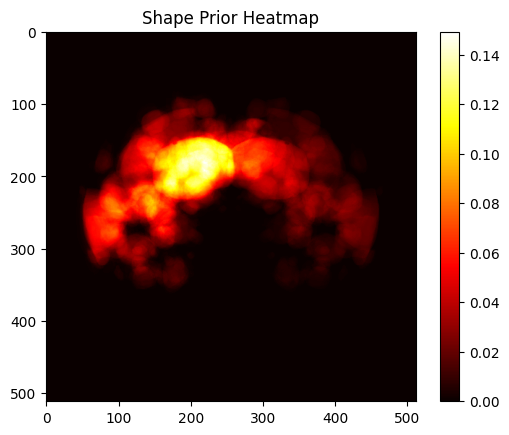

Epoch 1/50


2025-07-20 09:29:20.400787: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inUNetPP/X00_/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/454 [==============================] - 129s 255ms/step - loss: 0.9908 - dice_coef: 0.0133 - iou_score: 0.0067 - val_loss: 0.9992 - val_dice_coef: 8.6293e-04 - val_iou_score: 4.3166e-04
Epoch 2/50
454/454 [==============================] - 117s 257ms/step - loss: 0.9536 - dice_coef: 0.0498 - iou_score: 0.0259 - val_loss: 1.0001 - val_dice_coef: 2.2600e-10 - val_iou_score: 2.2600e-10
Epoch 3/50
454/454 [==============================] - 117s 257ms/step - loss: 0.9198 - dice_coef: 0.0814 - iou_score: 0.0440 - val_loss: 0.9912 - val_dice_coef: 0.0093 - val_iou_score: 0.0048
Epoch 4/50
454/454 [==============================] - 116s 255ms/step - loss: 0.9878 - dice_coef: 0.0131 - iou_score: 0.0070 - val_loss: 1.0001 - val_dice_coef: 2.3164e-10 - val_iou_score: 2.3164e-10
Epoch 5/50
454/454 [==============================] - 117s 257ms/step - loss: 0.9894 - dice_coef: 0.0140 - iou_score: 0.0070 - val_loss: 1.0001 - val_dice_coef: 2.3164e-10 - val_iou_score: 2.3164e-10
Epoch 6/50
454/454 

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Final model saved to: /workspace/3dircadmodels/shapeprior_no_weigts_start_from_scratch_point2.h5


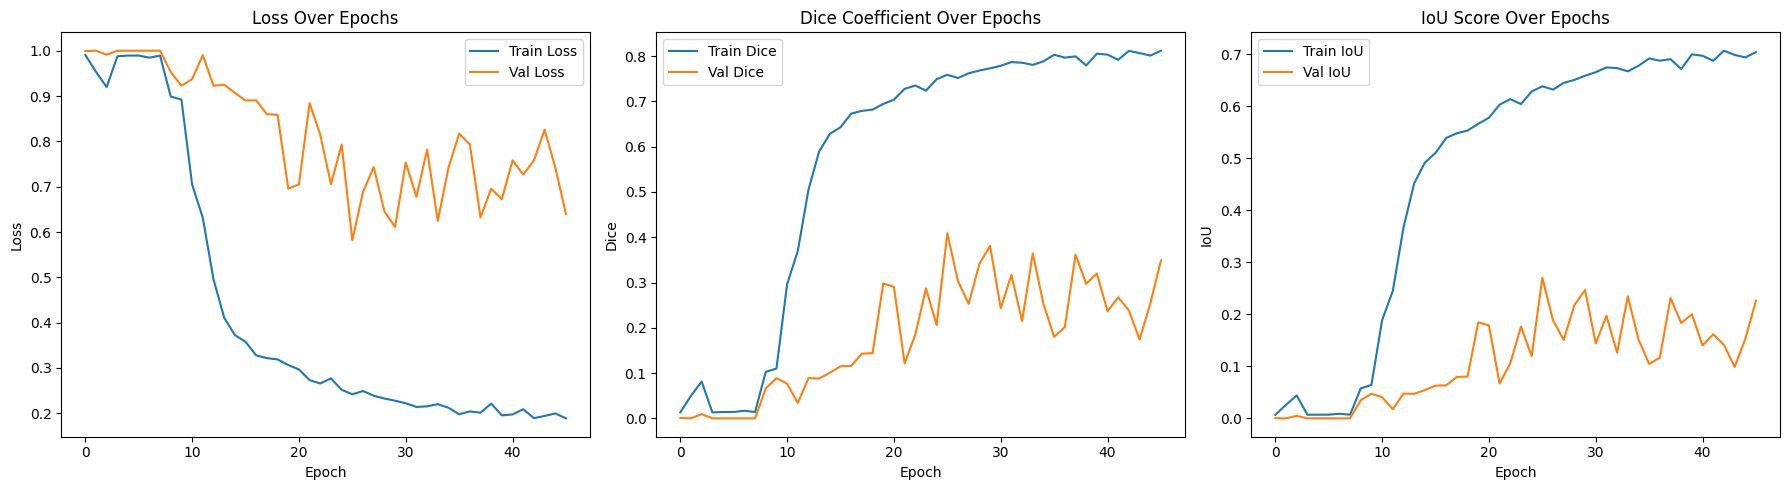

9947

In [ ]:

# === Load UNet++ Dynamically ===
unetpp_path = "/workspace/UNetPP.py"
spec = importlib.util.spec_from_file_location("UNetPP", unetpp_path)
unetpp_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(unetpp_module)
UNetPlusPlus = unetpp_module.UNetPlusPlus


# === Prepare Data ===
train_img_path = "/workspace/extracted/final_split_balanced/augmentedtrain/images"
train_mask_path = "/workspace/extracted/final_split_balanced/augmentedtrain/masks"
valid_img_path = "/workspace/extracted/final_split_balanced/valid/images"
valid_mask_path = "/workspace/extracted/final_split_balanced/valid/masks"

train_image_ids = sorted(os.listdir(train_img_path))
valid_image_ids = sorted(os.listdir(valid_img_path))

img_size = 512
batch_size = 4
epochs = 50
lr = 1e-4

train_gen = DICOMDataGen(train_image_ids, train_img_path, train_mask_path, batch_size, img_size, shuffle=True)
valid_gen = DICOMDataGen(valid_image_ids, valid_img_path, valid_mask_path, batch_size, img_size, shuffle=False)

# === Compute Shape Prior & Visualize ===
shape_prior = compute_shape_prior_from_generator(train_gen)

plt.imshow(shape_prior[..., 0], cmap='hot')
plt.title("Shape Prior Heatmap")
plt.colorbar()
plt.show()


# === Build Model ===
input_shape = (img_size, img_size, 1)
model = UNetPlusPlus(input_shape=input_shape).BuildNetwork()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=0.5)

model.compile(
    optimizer=optimizer,
    loss=total_loss_fn(shape_prior),
    metrics=[dice_coef, iou_score]
)

# === Training ===
callbacks = [
    EarlyStopping(monitor='val_dice_coef', mode='max', patience=20, restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# === Save Model ===
model_path = "/workspace/3dircadmodels/shapeprior_no_weigts_start_from_scratch_point2.h5"
model.save(model_path)
print(f"Final model saved to: {model_path}")

# === Plot Training Curves ===
history_dict = history.history
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_dict['dice_coef'], label='Train Dice')
plt.plot(history_dict['val_dice_coef'], label='Val Dice')
plt.title('Dice Coefficient Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_dict['iou_score'], label='Train IoU')
plt.plot(history_dict['val_iou_score'], label='Val IoU')
plt.title('IoU Score Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.legend()

plt.tight_layout()
plt.show()

# === Cleanup ===
tf.keras.backend.clear_session()
gc.collect()


In [ ]:
## === Custom Total Loss ===
def total_loss_fn(prior):
    prior_tensor = tf.convert_to_tensor(prior, dtype=tf.float32)
    def loss(y_true, y_pred):
        d_loss = dice_loss(y_true, y_pred)
        s_loss = tf.reduce_mean(tf.square(y_pred - prior_tensor))
        return d_loss + 0.08 * s_loss
    return loss


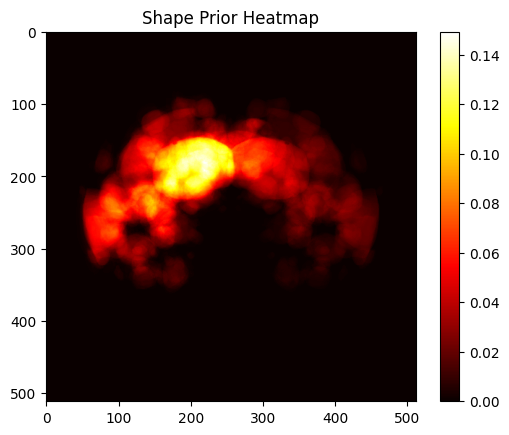

Epoch 1/50


2025-07-20 11:01:56.348044: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inUNetPP/X00_/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/454 [==============================] - 129s 255ms/step - loss: 0.9714 - dice_coef: 0.0323 - iou_score: 0.0167 - val_loss: 1.0000 - val_dice_coef: 3.0245e-08 - val_iou_score: 1.5238e-08
Epoch 2/50
454/454 [==============================] - 116s 256ms/step - loss: 0.9649 - dice_coef: 0.0371 - iou_score: 0.0194 - val_loss: 1.0000 - val_dice_coef: 5.1657e-08 - val_iou_score: 2.5944e-08
Epoch 3/50
454/454 [==============================] - 116s 255ms/step - loss: 0.9235 - dice_coef: 0.0805 - iou_score: 0.0435 - val_loss: 0.8789 - val_dice_coef: 0.1242 - val_iou_score: 0.0688
Epoch 4/50
454/454 [==============================] - 115s 253ms/step - loss: 0.8435 - dice_coef: 0.1586 - iou_score: 0.0909 - val_loss: 0.9115 - val_dice_coef: 0.0944 - val_iou_score: 0.0509
Epoch 5/50
454/454 [==============================] - 115s 252ms/step - loss: 0.8193 - dice_coef: 0.1830 - iou_score: 0.1072 - val_loss: 0.9459 - val_dice_coef: 0.0549 - val_iou_score: 0.0311
Epoch 6/50
454/454 [===============

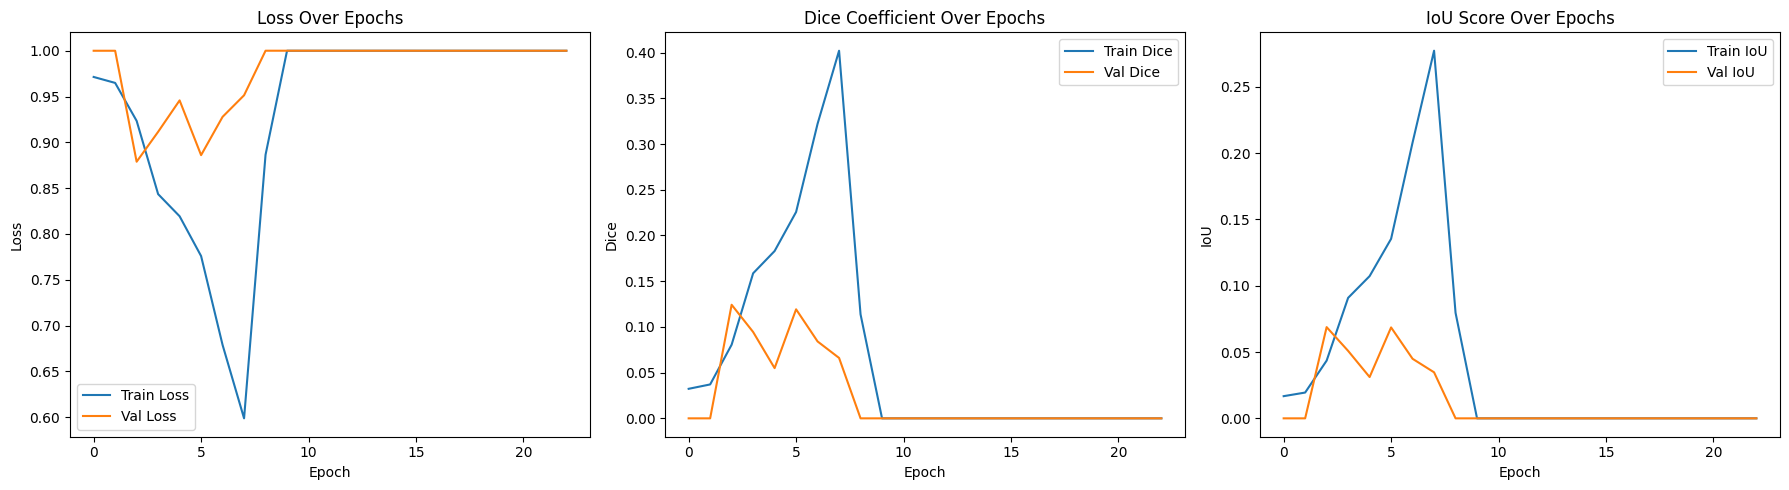

22204

In [ ]:

# === Load UNet++ Dynamically ===
unetpp_path = "/workspace/UNetPP.py"
spec = importlib.util.spec_from_file_location("UNetPP", unetpp_path)
unetpp_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(unetpp_module)
UNetPlusPlus = unetpp_module.UNetPlusPlus


# === Prepare Data ===
train_img_path = "/workspace/extracted/final_split_balanced/augmentedtrain/images"
train_mask_path = "/workspace/extracted/final_split_balanced/augmentedtrain/masks"
valid_img_path = "/workspace/extracted/final_split_balanced/valid/images"
valid_mask_path = "/workspace/extracted/final_split_balanced/valid/masks"

train_image_ids = sorted(os.listdir(train_img_path))
valid_image_ids = sorted(os.listdir(valid_img_path))

img_size = 512
batch_size = 4
epochs = 50
lr = 1e-4

train_gen = DICOMDataGen(train_image_ids, train_img_path, train_mask_path, batch_size, img_size, shuffle=True)
valid_gen = DICOMDataGen(valid_image_ids, valid_img_path, valid_mask_path, batch_size, img_size, shuffle=False)

# === Compute Shape Prior & Visualize ===
shape_prior = compute_shape_prior_from_generator(train_gen)

plt.imshow(shape_prior[..., 0], cmap='hot')
plt.title("Shape Prior Heatmap")
plt.colorbar()
plt.show()


# === Build Model ===
input_shape = (img_size, img_size, 1)
model = UNetPlusPlus(input_shape=input_shape).BuildNetwork()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=0.5)

model.compile(
    optimizer=optimizer,
    loss=total_loss_fn(shape_prior),
    metrics=[dice_coef, iou_score]
)

# === Training ===
callbacks = [
    EarlyStopping(monitor='val_dice_coef', mode='max', patience=20, restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# === Save Model ===
model_path = "/workspace/3dircadmodels/shapeprior_no_weigts_start_from_scratch_point08.h5"
model.save(model_path)
print(f"Final model saved to: {model_path}")

# === Plot Training Curves ===
history_dict = history.history
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_dict['dice_coef'], label='Train Dice')
plt.plot(history_dict['val_dice_coef'], label='Val Dice')
plt.title('Dice Coefficient Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_dict['iou_score'], label='Train IoU')
plt.plot(history_dict['val_iou_score'], label='Val IoU')
plt.title('IoU Score Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.legend()

plt.tight_layout()
plt.show()

# === Cleanup ===
tf.keras.backend.clear_session()
gc.collect()


In [ ]:
## === Custom Total Loss ===
def total_loss_fn(prior):
    prior_tensor = tf.convert_to_tensor(prior, dtype=tf.float32)
    def loss(y_true, y_pred):
        d_loss = dice_loss(y_true, y_pred)
        s_loss = tf.reduce_mean(tf.square(y_pred - prior_tensor))
        return d_loss + 0.60 * s_loss
    return loss


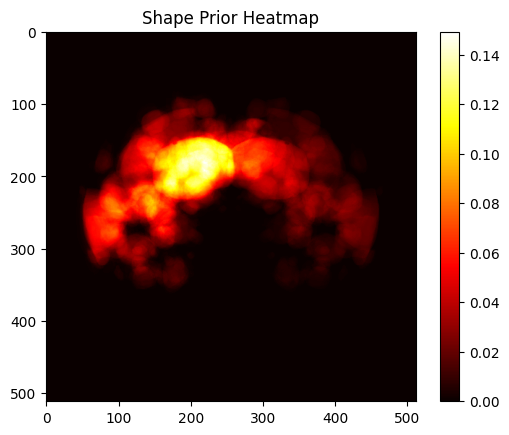

Epoch 1/50


2025-07-21 07:09:22.336158: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inUNetPP/X00_/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/454 [==============================] - 130s 257ms/step - loss: 1.0006 - dice_coef: 0.0057 - iou_score: 0.0029 - val_loss: 1.0006 - val_dice_coef: 1.3757e-10 - val_iou_score: 1.3756e-10
Epoch 2/50
454/454 [==============================] - 117s 257ms/step - loss: 0.9884 - dice_coef: 0.0162 - iou_score: 0.0083 - val_loss: 0.9585 - val_dice_coef: 0.0557 - val_iou_score: 0.0290
Epoch 3/50
454/454 [==============================] - 116s 256ms/step - loss: 0.9538 - dice_coef: 0.0496 - iou_score: 0.0266 - val_loss: 0.9991 - val_dice_coef: 0.0014 - val_iou_score: 7.0697e-04
Epoch 4/50
454/454 [==============================] - 116s 255ms/step - loss: 0.9439 - dice_coef: 0.0585 - iou_score: 0.0324 - val_loss: 1.0012 - val_dice_coef: 1.2281e-10 - val_iou_score: 1.2281e-10
Epoch 5/50
454/454 [==============================] - 115s 254ms/step - loss: 1.0002 - dice_coef: 2.5577e-04 - iou_score: 1.2792e-04 - val_loss: 1.0016 - val_dice_coef: 1.0664e-10 - val_iou_score: 1.0664e-10
Epoch 6/50
454/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



454/454 [==============================] - 115s 254ms/step - loss: 0.2854 - dice_coef: 0.7193 - iou_score: 0.5946 - val_loss: 0.9003 - val_dice_coef: 0.1128 - val_iou_score: 0.0661
Epoch 31/50
454/454 [==============================] - 115s 254ms/step - loss: 0.2754 - dice_coef: 0.7293 - iou_score: 0.6099 - val_loss: 0.8641 - val_dice_coef: 0.1568 - val_iou_score: 0.0891
Epoch 32/50
454/454 [==============================] - 115s 254ms/step - loss: 0.2782 - dice_coef: 0.7265 - iou_score: 0.6043 - val_loss: 0.7620 - val_dice_coef: 0.2550 - val_iou_score: 0.1542
Epoch 33/50
454/454 [==============================] - 115s 254ms/step - loss: 0.2690 - dice_coef: 0.7357 - iou_score: 0.6160 - val_loss: 0.8484 - val_dice_coef: 0.1693 - val_iou_score: 0.0970
Epoch 34/50
454/454 [==============================] - 115s 253ms/step - loss: 0.2554 - dice_coef: 0.7494 - iou_score: 0.6302 - val_loss: 0.7701 - val_dice_coef: 0.2412 - val_iou_score: 0.1446
Epoch 35/50
454/454 [==========================

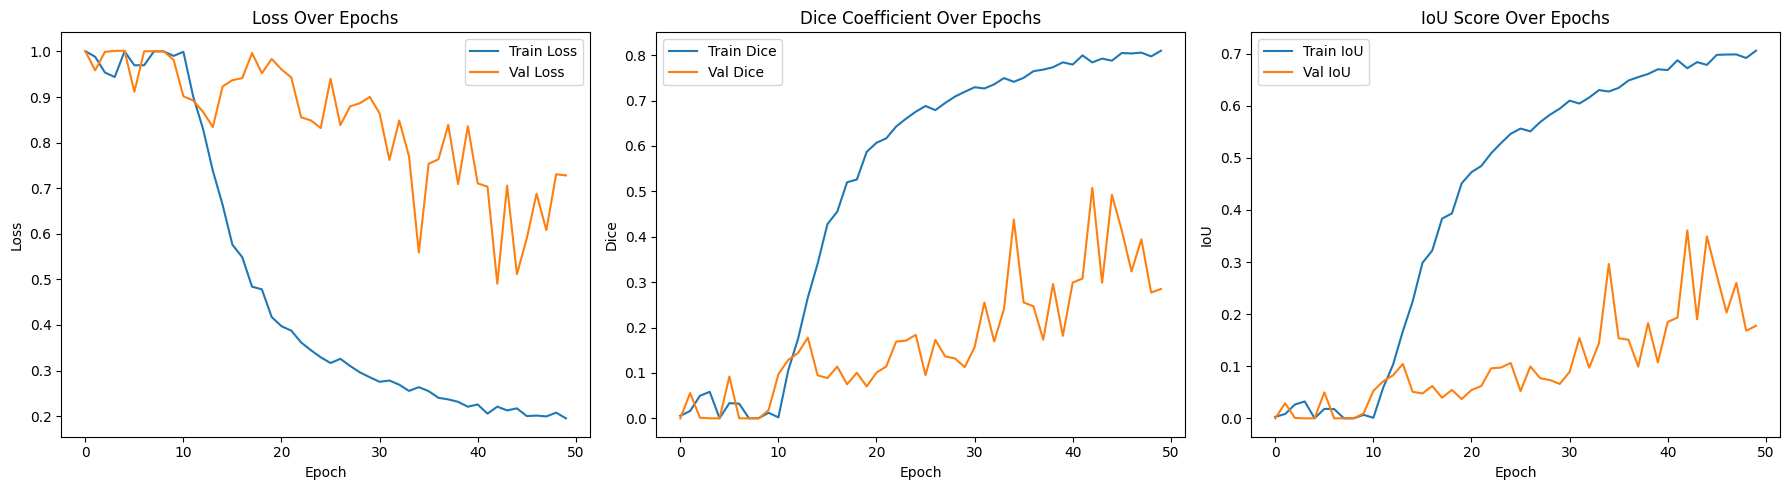

22709

In [ ]:

# === Load UNet++ Dynamically ===
unetpp_path = "/workspace/UNetPP.py"
spec = importlib.util.spec_from_file_location("UNetPP", unetpp_path)
unetpp_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(unetpp_module)
UNetPlusPlus = unetpp_module.UNetPlusPlus


# === Prepare Data ===
train_img_path = "/workspace/extracted/final_split_balanced/augmentedtrain/images"
train_mask_path = "/workspace/extracted/final_split_balanced/augmentedtrain/masks"
valid_img_path = "/workspace/extracted/final_split_balanced/valid/images"
valid_mask_path = "/workspace/extracted/final_split_balanced/valid/masks"

train_image_ids = sorted(os.listdir(train_img_path))
valid_image_ids = sorted(os.listdir(valid_img_path))

img_size = 512
batch_size = 4
epochs = 50
lr = 1e-4

train_gen = DICOMDataGen(train_image_ids, train_img_path, train_mask_path, batch_size, img_size, shuffle=True)
valid_gen = DICOMDataGen(valid_image_ids, valid_img_path, valid_mask_path, batch_size, img_size, shuffle=False)

# === Compute Shape Prior & Visualize ===
shape_prior = compute_shape_prior_from_generator(train_gen)

plt.imshow(shape_prior[..., 0], cmap='hot')
plt.title("Shape Prior Heatmap")
plt.colorbar()
plt.show()


# === Build Model ===
input_shape = (img_size, img_size, 1)
model = UNetPlusPlus(input_shape=input_shape).BuildNetwork()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=0.5)

model.compile(
    optimizer=optimizer,
    loss=total_loss_fn(shape_prior),
    metrics=[dice_coef, iou_score]
)

# === Training ===
callbacks = [
    EarlyStopping(monitor='val_dice_coef', mode='max', patience=20, restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# === Save Model ===
model_path = "/workspace/3dircadmodels/shapeprior_no_weigts_start_from_scratch_point6.h5"
model.save(model_path)
print(f"Final model saved to: {model_path}")

# === Plot Training Curves ===
history_dict = history.history
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_dict['dice_coef'], label='Train Dice')
plt.plot(history_dict['val_dice_coef'], label='Val Dice')
plt.title('Dice Coefficient Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_dict['iou_score'], label='Train IoU')
plt.plot(history_dict['val_iou_score'], label='Val IoU')
plt.title('IoU Score Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.legend()

plt.tight_layout()
plt.show()

# === Cleanup ===
tf.keras.backend.clear_session()
gc.collect()


In [ ]:
#combined total loss

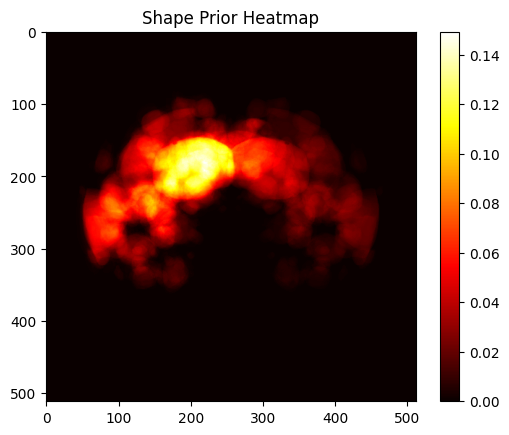

Epoch 1/50


2025-07-21 09:39:52.975592: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inUNetPP/X00_/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/454 [==============================] - 133s 261ms/step - loss: 1.0969 - dice_coef: 0.0477 - iou_score: 0.0248 - val_loss: 1.0483 - val_dice_coef: 0.0447 - val_iou_score: 0.0231
Epoch 2/50
454/454 [==============================] - 118s 260ms/step - loss: 1.0508 - dice_coef: 0.0359 - iou_score: 0.0190 - val_loss: 0.9998 - val_dice_coef: 0.0681 - val_iou_score: 0.0357
Epoch 3/50
454/454 [==============================] - 117s 257ms/step - loss: 0.9548 - dice_coef: 0.1216 - iou_score: 0.0672 - val_loss: 1.0723 - val_dice_coef: 2.0369e-05 - val_iou_score: 1.0185e-05
Epoch 4/50
454/454 [==============================] - 117s 257ms/step - loss: 1.0666 - dice_coef: 4.0601e-05 - iou_score: 2.0356e-05 - val_loss: 1.0655 - val_dice_coef: 1.9498e-04 - val_iou_score: 9.7548e-05
Epoch 5/50
454/454 [==============================] - 117s 258ms/step - loss: 0.9669 - dice_coef: 0.0934 - iou_score: 0.0532 - val_loss: 0.9685 - val_dice_coef: 0.0980 - val_iou_score: 0.0530
Epoch 6/50
454/454 [=======

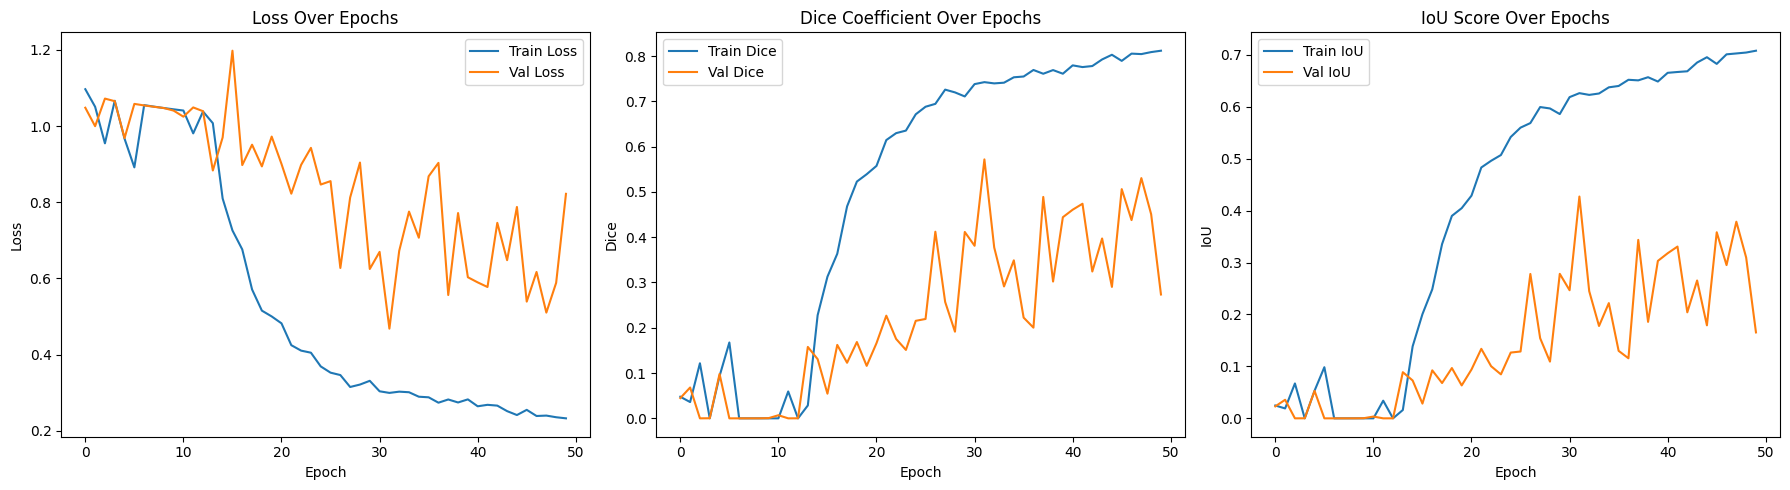

22301

In [ ]:
import os
import gc
import importlib.util
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# === Load UNet++ Dynamically ===
unetpp_path = "/workspace/UNetPP.py"
spec = importlib.util.spec_from_file_location("UNetPP", unetpp_path)
unetpp_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(unetpp_module)
UNetPlusPlus = unetpp_module.UNetPlusPlus

# === Loss Functions ===
def dice_loss(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return 1.0 - (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    y_pred = tf.clip_by_value(y_pred, 1e-6, 1.0 - 1e-6)
    pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
    loss = -alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt)
    return tf.reduce_mean(loss)

def total_loss_fn(prior, model, weights):
    prior_tensor = tf.convert_to_tensor(prior, dtype=tf.float32)

    def loss(y_true, y_pred):
        d_loss = dice_loss(y_true, y_pred)
        s_loss = tf.reduce_mean(tf.square(y_pred - prior_tensor))
        f_loss = focal_loss(y_true, y_pred)
        l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in model.trainable_weights])
        return (
            weights['dice'] * d_loss +
            weights['shape'] * s_loss +
            weights['focal'] * f_loss +
            weights['l2'] * l2_loss
        )

    return loss

# === Metrics ===
def dice_coef(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def iou_score(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# === Prepare Data ===
train_img_path = "/workspace/extracted/final_split_balanced/augmentedtrain/images"
train_mask_path = "/workspace/extracted/final_split_balanced/augmentedtrain/masks"
valid_img_path = "/workspace/extracted/final_split_balanced/valid/images"
valid_mask_path = "/workspace/extracted/final_split_balanced/valid/masks"

train_image_ids = sorted(os.listdir(train_img_path))
valid_image_ids = sorted(os.listdir(valid_img_path))

img_size = 512
batch_size = 4
epochs = 50
lr = 1e-4

train_gen = DICOMDataGen(train_image_ids, train_img_path, train_mask_path, batch_size, img_size, shuffle=True)
valid_gen = DICOMDataGen(valid_image_ids, valid_img_path, valid_mask_path, batch_size, img_size, shuffle=False)

# === Compute Shape Prior & Visualize ===
shape_prior = compute_shape_prior_from_generator(train_gen)

plt.imshow(shape_prior[..., 0], cmap='hot')
plt.title("Shape Prior Heatmap")
plt.colorbar()
plt.show()

# === Build Model ===
input_shape = (img_size, img_size, 1)
model = UNetPlusPlus(input_shape=input_shape).BuildNetwork()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=0.5)

# === Compile Model with Combined Loss ===
weights = {
    'dice': 1.0,
    'shape': 0.2,
    'focal': 0.5,
    'l2': 1e-4
}

model.compile(
    optimizer=optimizer,
    loss=total_loss_fn(shape_prior, model, weights),
    metrics=[dice_coef, iou_score]
)

# === Training ===
callbacks = [
    EarlyStopping(monitor='val_dice_coef', mode='max', patience=20, restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# === Save Model ===
model_path = "/workspace/3dircadmodels/shapeprior_combined_loss.h5"
model.save(model_path)
print(f"Final model saved to: {model_path}")

# === Plot Training Curves ===
history_dict = history.history
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_dict['dice_coef'], label='Train Dice')
plt.plot(history_dict['val_dice_coef'], label='Val Dice')
plt.title('Dice Coefficient Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_dict['iou_score'], label='Train IoU')
plt.plot(history_dict['val_iou_score'], label='Val IoU')
plt.title('IoU Score Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.legend()

plt.tight_layout()
plt.show()

# === Cleanup ===
tf.keras.backend.clear_session()
gc.collect()


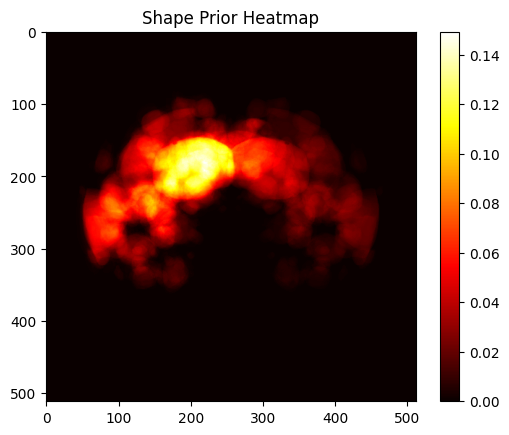

Epoch 1/150


2025-07-21 12:43:43.938085: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inUNetPP/X00_/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/454 [==============================] - 132s 259ms/step - loss: 0.8271 - dice_coef: 0.0207 - iou_score: 0.0107 - val_loss: 0.7882 - val_dice_coef: 2.2810e-10 - val_iou_score: 2.2535e-10
Epoch 2/150
454/454 [==============================] - 118s 260ms/step - loss: 0.7622 - dice_coef: 0.0087 - iou_score: 0.0045 - val_loss: 0.7562 - val_dice_coef: 2.1585e-10 - val_iou_score: 2.1531e-10
Epoch 3/150
454/454 [==============================] - 118s 260ms/step - loss: 0.7375 - dice_coef: 0.0143 - iou_score: 0.0074 - val_loss: 0.7422 - val_dice_coef: 4.0985e-06 - val_iou_score: 2.0493e-06
Epoch 4/150
454/454 [==============================] - 118s 259ms/step - loss: 0.7194 - dice_coef: 0.0263 - iou_score: 0.0139 - val_loss: 0.7336 - val_dice_coef: 1.7381e-04 - val_iou_score: 8.6915e-05
Epoch 5/150
454/454 [==============================] - 117s 257ms/step - loss: 0.7326 - dice_coef: 0.0017 - iou_score: 9.0700e-04 - val_loss: 0.7321 - val_dice_coef: 2.2851e-10 - val_iou_score: 2.2851e-10
Epo

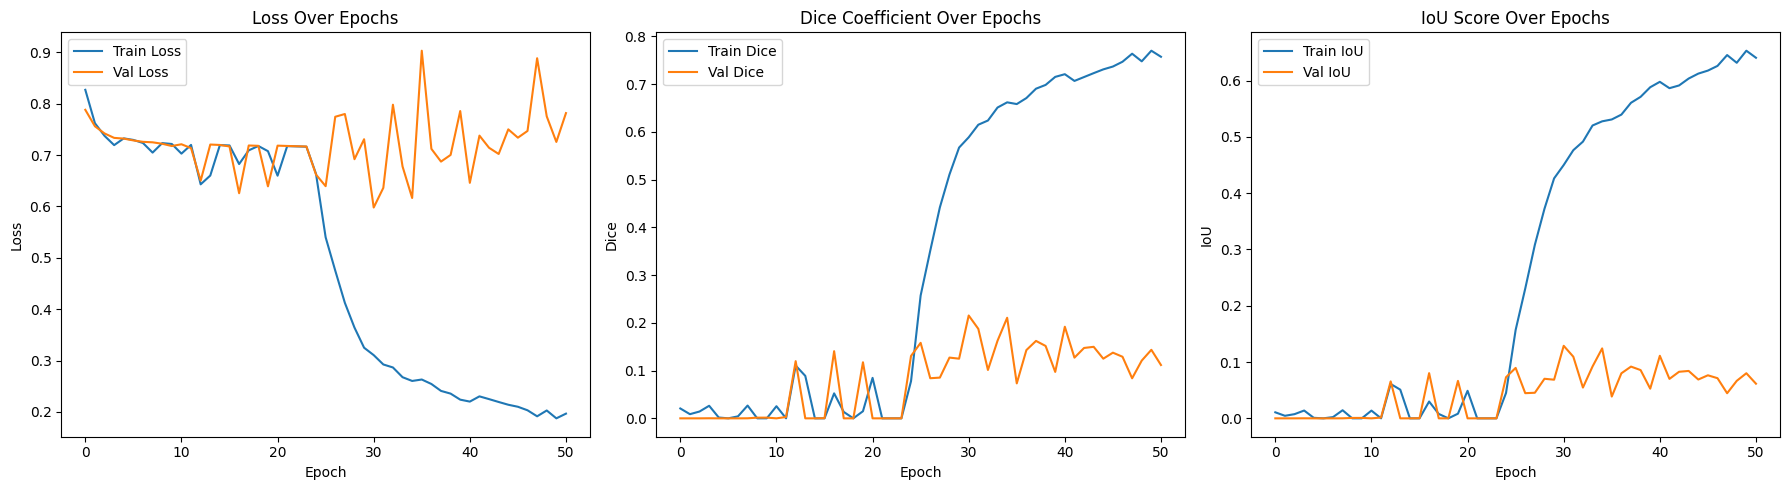

23559

In [ ]:
#change weights of loss function
import os
import gc
import importlib.util
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# === Load UNet++ Dynamically ===
unetpp_path = "/workspace/UNetPP.py"
spec = importlib.util.spec_from_file_location("UNetPP", unetpp_path)
unetpp_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(unetpp_module)
UNetPlusPlus = unetpp_module.UNetPlusPlus

# === Loss Functions ===
def dice_loss(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return 1.0 - (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    y_pred = tf.clip_by_value(y_pred, 1e-6, 1.0 - 1e-6)
    pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
    loss = -alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt)
    return tf.reduce_mean(loss)

def total_loss_fn(prior, model, weights):
    prior_tensor = tf.convert_to_tensor(prior, dtype=tf.float32)

    def loss(y_true, y_pred):
        d_loss = dice_loss(y_true, y_pred)
        s_loss = tf.reduce_mean(tf.square(y_pred - prior_tensor))
        f_loss = focal_loss(y_true, y_pred)
        l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in model.trainable_weights])
        return (
            weights['dice'] * d_loss +
            weights['shape'] * s_loss +
            weights['focal'] * f_loss +
            weights['l2'] * l2_loss
        )

    return loss

# === Metrics ===
def dice_coef(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def iou_score(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# === Prepare Data ===
train_img_path = "/workspace/extracted/final_split_balanced/augmentedtrain/images"
train_mask_path = "/workspace/extracted/final_split_balanced/augmentedtrain/masks"
valid_img_path = "/workspace/extracted/final_split_balanced/valid/images"
valid_mask_path = "/workspace/extracted/final_split_balanced/valid/masks"

train_image_ids = sorted(os.listdir(train_img_path))
valid_image_ids = sorted(os.listdir(valid_img_path))

img_size = 512
batch_size = 4
epochs = 150
lr = 1e-4

train_gen = DICOMDataGen(train_image_ids, train_img_path, train_mask_path, batch_size, img_size, shuffle=True)
valid_gen = DICOMDataGen(valid_image_ids, valid_img_path, valid_mask_path, batch_size, img_size, shuffle=False)

# === Compute Shape Prior & Visualize ===
shape_prior = compute_shape_prior_from_generator(train_gen)

plt.imshow(shape_prior[..., 0], cmap='hot')
plt.title("Shape Prior Heatmap")
plt.colorbar()
plt.show()

# === Build Model ===
input_shape = (img_size, img_size, 1)
model = UNetPlusPlus(input_shape=input_shape).BuildNetwork()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=0.5)

# === Compile Model with Combined Loss ===
weights = {
    'dice': 0.7,
    'shape': 0.3,     # give more anatomical influence
    'focal': 0.3,
    'l2': 1e-4         # VERY low: keep this small
}
model.compile(
    optimizer=optimizer,
    loss=total_loss_fn(shape_prior, model, weights),
    metrics=[dice_coef, iou_score]
)

# === Training ===
callbacks = [
    EarlyStopping(monitor='val_dice_coef', mode='max', patience=20, restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# === Save Model ===
model_path = "/workspace/3dircadmodels/shapeprior_combined_loss_2.h5"
model.save(model_path)
print(f"Final model saved to: {model_path}")

# === Plot Training Curves ===
history_dict = history.history
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_dict['dice_coef'], label='Train Dice')
plt.plot(history_dict['val_dice_coef'], label='Val Dice')
plt.title('Dice Coefficient Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_dict['iou_score'], label='Train IoU')
plt.plot(history_dict['val_iou_score'], label='Val IoU')
plt.title('IoU Score Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.legend()

plt.tight_layout()
plt.show()

# === Cleanup ===
tf.keras.backend.clear_session()
gc.collect()
